# CSGO Oracle
## Lucas Vidigal e Tiago Trotta

### 1. Introdução


CS:GO (Counter-Strike Global Offensive) é um jogo tático de tiro em primeira pessoa(FPS) desenvolvido pelas empresas Valve Corporation e Hidden Path Entertainment, foi lançado no dia 21 de agosto. 

Segundo estátisticas da Steam(Plataforma de Jogos da Valve), o CS:GO conta com uma média diária de 700mil usuários por dia, sendo um número muito alto, ao levarmos em conta que o jogo foi lançado em 2012.

<center><img src="https://miro.medium.com/max/3200/1*ZTtOmEJR6gBK9-0BkoOFkQ.png" alt="CampCS" style="width:650px;"/></center>

Um dos grandes fatores que ainda matêm a comunidade do CS:GO Viva são os campeonatos profissionais realizados por grandes marcas. Deixando os números do cenário fervendo:
* Seundo o site da ESPN, a final do campeonato mundial "Eleague Major" em 2017 teve mais de 1 Milhão de espectadores simutâneos na plataforma da Twitch;
* O mercado de apostas de skins(Items cosméticos de valor monetário real que podem ser usadas dentro do jogo) gerou uma receita de mais de 10 Bilhões de Dólares.

De olho Nessas estátisticas, o objetivo desse trabalho é propor um algoritmo, que utiliza a análise de redes complexas para fazer previsões de resultados de partidas e campeonatos, a partir de uma rede de confrontos gerada por dados de partidas reais do cenário competitivo de CS:GO.

### 2. Extração dos Dados
A coleta dos dados para uma determinada rede de confrontos, foi feita com o auxílio da API do portal de notícias HLTV. A HLTV é um site muito famoso no cenário de CS, além de possuir notícias atualizadas sobre o jogo, são encontrado estáticas de times, jogadores, partidas e campeonatos. Todas essas informações são disponibilizas gratuitamente e podem ser obtidas pela sua API.

Documentação API HLTV: https://www.npmjs.com/package/hltv
 
 

### 3. Modelagem da Rede

![Grafo de Exemplo 1](https://drive.google.com/uc?id=1mnaVL4JRYgL1UJMaltBuWjPiBpeHtWOR "Rede de Exemplo")

A imagem acima mostra um exemplo de uma rede imaginária



### 4. Imports das dependências

In [37]:
from network import Network
import p_calc
import io_op
import experiments
import matplotlib.pyplot as plt

### 5. Carregamento da rede
#### 5.1. Definição da rede

In [17]:
# network_file = "BLAST-Premier-Fall-2020-30"
network_file = "IEM-BEIJING-HAIDIAN-2020-31"

#### 5.2. Carregamento a partir de arquivo gt ou construção a partir de json

In [4]:
# Carregamento de uma rede já construida, salva em um arquivo no formato gt
net = Network(file_name=network_file + ".gt")

In [19]:
# Construção de uma nova rede a partir de um arquivo json
nodes_info, links_info = io_op.read_json(str(network_file + ".json"))
net = Network(nodes_info=nodes_info, links_info=links_info)

#### 5.3. *Opcional*: Salvamento da rede em um arquivo no formato gt

In [20]:
net.save_network(network_file + ".gt")

True

#### 5.4. *Opcional*: Renderização de uma representação gráfica da rede em pdf

In [21]:
net.draw(network_file + ".pdf", "pdf")

### 6. Informações da rede

#### 6.1. Informações básicas:

In [22]:
print("Informações básicas sobre a rede \"" + network_file + "\":")
print("\n".join(["\t" + k + ": " + str(v) for k, v in net.get_basic_info().items()]))

Informações básicas sobre a rede "IEM-BEIJING-HAIDIAN-2020-31":
	Número de times: 46
	Número de confrontos: 496
	Densidade: 0.4792270531400966
	Grau médio: 21.565217391304348
	Coeficiente de Clusterização: 0.33328344719598063


#### 6.2. Distribuição de graus:

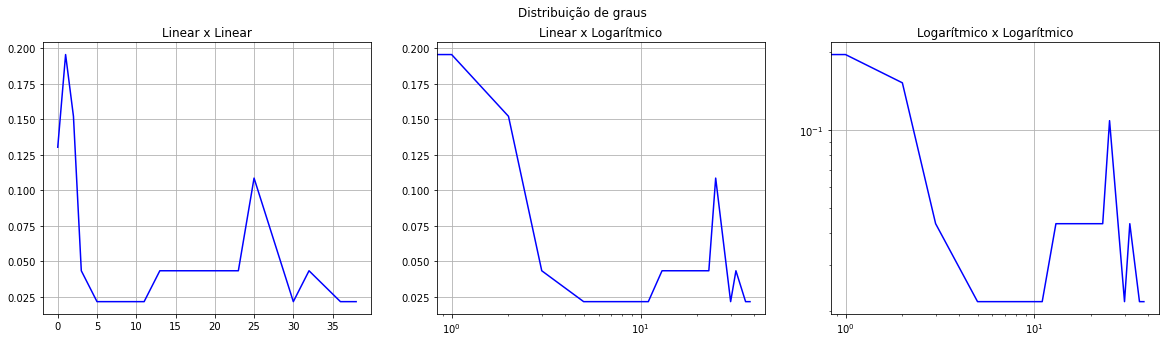

In [23]:
degree_dist = net.degree_distribution()
plot_list = sorted(degree_dist.items()) # Ordenando por chave, returna uma lista de tuplas
x, y = zip(*plot_list) # Transforma a lista de (chave, valor) em duas tuplas

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title("Linear x Linear")
plt.grid(True)
plt.plot(x, y, "b-")

plt.subplot(132)
plt.xscale("log")
plt.title("Linear x Logarítmico")
plt.grid(True)
plt.plot(x, y, "b-")

plt.subplot(133)
plt.yscale("log")
plt.xscale("log")
plt.title("Logarítmico x Logarítmico")
plt.grid(True)
plt.plot(x, y, "b-")

plt.suptitle("Distribuição de graus")
plt.show()

### 7. Cálculos probabilísticos

#### 7.1. Cálculo dos top-n times com a maior probabilidade de ganhar o campeonato

In [26]:
team_number = 10

In [27]:
# Cálculo do ranking através do Page Rank
print("Times com mais chances de ganhar com base no Page Rank:")
print("\n".join(["\t" + n + " - PgR: " + str(v["Page Rank"]) +
                ", Prob.: " + str(v["Probabilidade"])
                 for n, v in p_calc.get_top_rank_pgr(net, team_number)]))

Times com mais chances de ganhar com base no Page Rank:
	Vitality - PgR: 0.07477504899407524, Prob.: 7.477504899407523
	OG - PgR: 0.06923517450948198, Prob.: 6.923517450948198
	Heroic - PgR: 0.06486762935696766, Prob.: 6.486762935696766
	Astralis - PgR: 0.06313364575741584, Prob.: 6.313364575741584
	mousesports - PgR: 0.05618693176995362, Prob.: 5.618693176995362
	Natus Vincere - PgR: 0.05399367756291037, Prob.: 5.399367756291037
	BIG - PgR: 0.05325678555655696, Prob.: 5.3256785556556965
	G2 - PgR: 0.04273061705073752, Prob.: 4.273061705073752
	NiP - PgR: 0.04242560359974126, Prob.: 4.242560359974126
	Complexity - PgR: 0.039590086651009375, Prob.: 3.9590086651009373


In [28]:
# Cálculo do ranking através da Centralidade por Grau
print("Times com mais chances de ganhar com base na Centralidade por Grau:")
print("\n".join(["\t" + n + " - PgR: " + str(v["Centralidade Grau"]) +
                ", Prob.: " + str(v["Probabilidade"])
                 for n, v in p_calc.get_top_rank_degree(net, team_number)]))

Times com mais chances de ganhar com base na Centralidade por Grau:
	Vitality - PgR: 0.8444444444444444, Prob.: 7.661290322580648
	OG - PgR: 0.8, Prob.: 7.258064516129036
	Heroic - PgR: 0.7111111111111111, Prob.: 6.451612903225809
	Astralis - PgR: 0.7111111111111111, Prob.: 6.451612903225809
	BIG - PgR: 0.6666666666666666, Prob.: 6.048387096774195
	mousesports - PgR: 0.5555555555555556, Prob.: 5.040322580645163
	fnatic - PgR: 0.5555555555555556, Prob.: 5.040322580645163
	NiP - PgR: 0.5555555555555556, Prob.: 5.040322580645163
	Natus Vincere - PgR: 0.5555555555555556, Prob.: 5.040322580645163
	Complexity - PgR: 0.5555555555555556, Prob.: 5.040322580645163


#### 7.2. Probabilidade de vitória de dois times em um confronto específico

In [7]:
team1 = "MIBR"
team2 = "Complexity"

In [8]:
# Cálculo das probabilidades através do Page Rank
print("\nProbabilidades de vitória em um confronto entre", team1, "e", team2)
print("\n".join(["\t" + n + ": " + "{:.2f}".format(p) + "%"
                for n, p in p_calc.get_prob_match_pgr(team1, team2, net).items()]))


Probabilidades de vitória em um confronto entre MIBR e Complexity
	MIBR: 32.79%
	Complexity: 67.21%


In [9]:
# Cálculo das probabilidades através da Centralidade de Grau
print("\nProbabilidades de vitória em um confronto entre", team1, "e", team2)
print("\n".join(["\t" + n + ": " + "{:.2f}".format(p) + "%"
                for n, p in p_calc.get_prob_match_degree(team1, team2, net).items()]))


Probabilidades de vitória em um confronto entre MIBR e Complexity
	MIBR: 26.19%
	Complexity: 73.81%


### 8. Outros Experimentos
#### 8.1. Simulação de vários confrontos

In [30]:
# Vetor com os diversos confrontos
matches = [("FaZe", "G2"), ("Astralis", "Natus Vincere"), ("Complexity", "BIG"), ("Heroic", "Vitality"),
            ("G2", "Natus Vincere"), ("Complexity", "Vitality"), ("Natus Vincere", "Vitality")
            ]

In [31]:
experiments.simulate_various_matches(matches, net)

Page Rank:

Probabilidades de vitória em um confronto entre FaZe e G2
	FaZe: 45.49%
	G2: 54.51%

Probabilidades de vitória em um confronto entre Astralis e Natus Vincere
	Astralis: 53.90%
	Natus Vincere: 46.10%

Probabilidades de vitória em um confronto entre Complexity e BIG
	Complexity: 42.64%
	BIG: 57.36%

Probabilidades de vitória em um confronto entre Heroic e Vitality
	Heroic: 46.45%
	Vitality: 53.55%

Probabilidades de vitória em um confronto entre G2 e Natus Vincere
	G2: 44.18%
	Natus Vincere: 55.82%

Probabilidades de vitória em um confronto entre Complexity e Vitality
	Complexity: 34.62%
	Vitality: 65.38%

Probabilidades de vitória em um confronto entre Natus Vincere e Vitality
	Natus Vincere: 41.93%
	Vitality: 58.07%

Centralidade por Grau:

Probabilidades de vitória em um confronto entre FaZe e G2
	FaZe: 46.51%
	G2: 53.49%

Probabilidades de vitória em um confronto entre Astralis e Natus Vincere
	Astralis: 56.14%
	Natus Vincere: 43.86%

Probabilidades de vitória em um confr

#### 8.1. Simulação dos Playoffs

In [36]:
for k, v in experiments.simulate_brackets(net).items():
    print(k+":", v)

Quarter Finals: [('FaZe', 'G2'), ('Astralis', 'Natus Vincere'), ('Complexity', 'BIG'), ('Heroic', 'Vitality')]
Semi Finals: [('G2', 'Astralis'), ('BIG', 'Vitality')]
Grand Final: [('Astralis', 'Vitality')]
Winner: Vitality
